In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer

In [56]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare','Survived'])

In [57]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [58]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [59]:
df.dropna(inplace=True) #dropped the missing value rows.

In [60]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [61]:
df.shape

(714, 3)

In [62]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
clf = DecisionTreeClassifier()

clf.fit(x_train,y_train) #train
y_pred = clf.predict(x_test) #test

accuracy_score(y_test,y_pred)*100

62.93706293706294

In [65]:
#creating two objects of the KBinDiscretizer
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [66]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),         #(name_given_to_column, transformer, index_of_column)
    ('second',kbin_fare,[1])
])

In [67]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.fit_transform(x_test)

In [68]:
trf.named_transformers_['first'].bin_edges_ # just an attribute to see the age intervals

array([array([ 1.        ,  9.        , 15.9       , 17.        , 20.        ,
              21.        , 24.        , 26.        , 28.        , 30.1       ,
              33.66666667, 36.        , 38.6       , 44.06666667, 52.        ,
              62.        ])                                                   ],
      dtype=object)

In [69]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1],
})

In [70]:
output['age_labels']=pd.cut(x=x_train['Age'],
                            bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels']=pd.cut(x=x_train['Fare'],
                            bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [71]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
88,23.0,5.0,263.0000,14.0,"(21.0, 24.0]","(79.277, 512.329]"
651,18.0,2.0,23.0000,8.0,"(17.0, 20.0]","(22.62, 26.353]"
302,19.0,3.0,0.0000,0.0,"(17.0, 20.0]",NaN
526,50.0,13.0,10.5000,5.0,"(44.067, 52.0]","(9.5, 10.5]"
877,19.0,3.0,7.8958,3.0,"(17.0, 20.0]","(7.773, 7.925]"


In [72]:
clf = DecisionTreeClassifier()

clf.fit(x_train_trf,y_train) #train
y_pred2 = clf.predict(x_test_trf) #test

accuracy_score(y_test,y_pred2)*100

65.03496503496503

In [75]:
def dis(bins,strategy):
  kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
  ])

  x_trf = trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))*100)

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Age'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(x_trf[:,0],color='red')
  plt.title('After')

  plt.show()

63.17097026604068


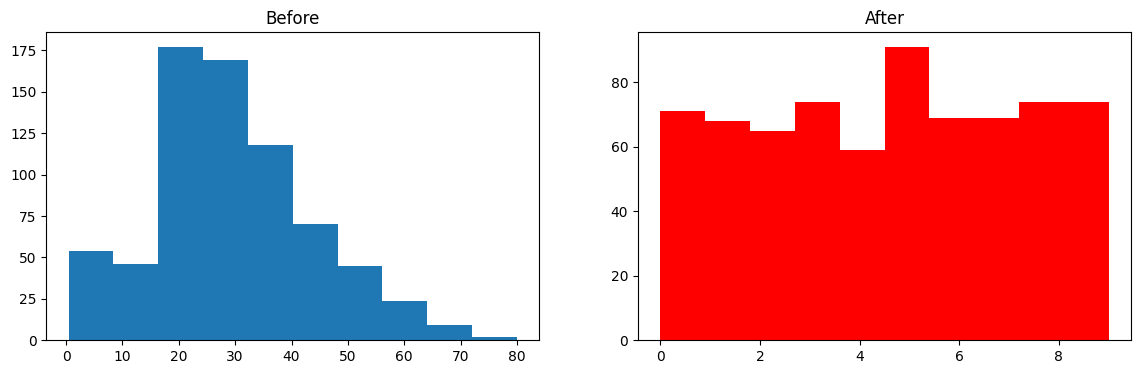

In [76]:
dis(10,'quantile')